# Описание данных

- **_PassengerId_**: Уникальный ID 
- **_Pclass_**: Класс каюты пассажира
- **_Name_**: Имя пассажира (удалён во время предобработки данных)
- **_Sex_**: Пол пассажира
- **_Age_**: Возраст пассажира
- **_SibSp_**: Количество братьев, сестер или супругов пассажира, которые находились с ним на борту
- **_Parch_**: Количество родителей или детей, которые находились с пассажиром на борту
- **_Ticket_**: Номер билета (удалён во время предобработки данных)
- **_Fare_**: Стоимость билета
- **_Cabin_**: Номер каюты пассажира (удалён во время предобработки данных)
- **_Embarked_**: Порт, в который пассажир сел на борт
- **_Survived_**: Выжил пассажир или нет (**_Target_**)

# Загрузка библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize' : (7, 5)})
sns.color_palette("pastel")
sns.set_style("ticks") 

# EDA

In [3]:
train_df = pd.read_csv('data/preprocessed_data/train.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Сразу можно отметить, что в наборе данных присутствуют категориальные признаки, такие как "Pclass", "Sex" и "Embarked". 

### Количество уникальных значений признаков

In [5]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             89
SibSp            7
Parch            7
Fare           248
Embarked         3
dtype: int64

### Типы данных признаков

In [6]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

### Основные статистики о пассажирах корабля

In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


### Столбчатая диаграмма целевого признака

C:\Users\MrDin\AppData\Local\Temp\ipykernel_8852\1346811174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df,


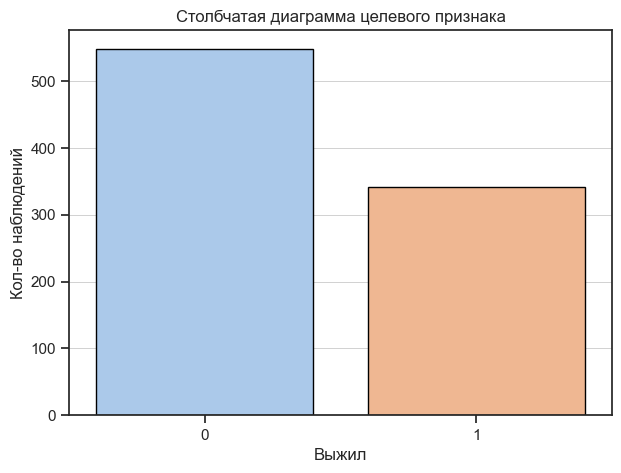

In [22]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
              x='Survived',
              palette = "pastel",
              edgecolor='black')
plt.xlabel('Выжил')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма целевого признака')
plt.show()

Похоже в наборе данных присутствует небольшой дисбаланс классов.

### Столбчатая диаграмма целевого признака в зависимости от пола

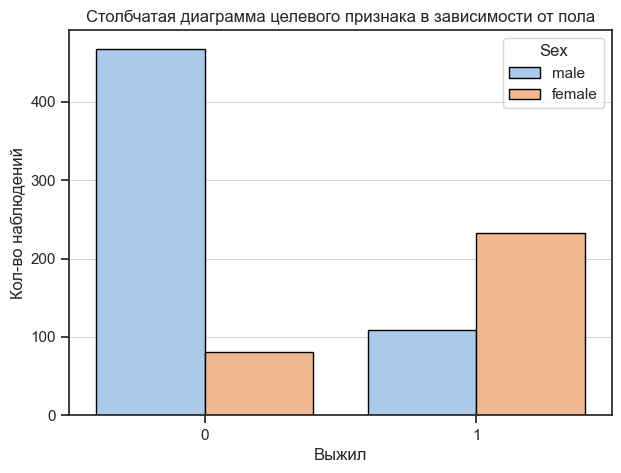

In [9]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
              x='Survived',
              hue='Sex',
              palette = "pastel",
              edgecolor='black')
plt.xlabel('Выжил')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма целевого признака в зависимости от пола')
plt.show()

1. В наборе данных больше мужчин чем женщин
2. Несмотря на то, что женщин меньше, их выжило больше, чем мужчин
3. Выжило около 75% женщин и 19% мужчин

### Столбчатая диаграмма целевого признака в зависимости от класса каюты

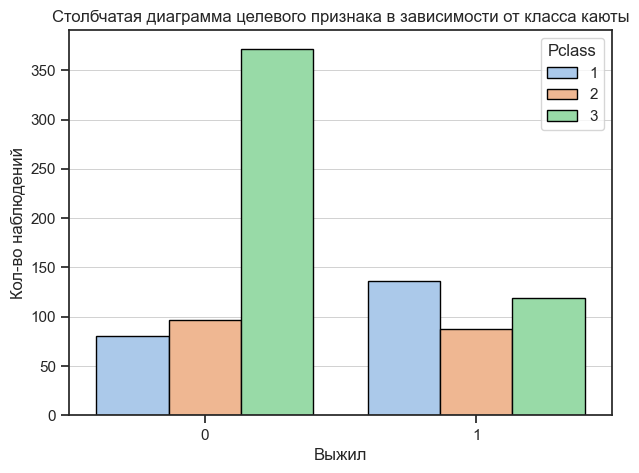

In [10]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
              x='Survived',
              hue='Pclass',
              palette = "pastel",
              edgecolor='black')
plt.xlabel('Выжил')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма целевого признака в зависимости от класса каюты')
plt.show()

1. Большинство пассажиров имеют каюты 3 класса и большинство из них не выжило
2. Большая половины пассажиров 1 класса выжило

### Столбчатая диаграмма целевого признака в зависимости от порта посадки

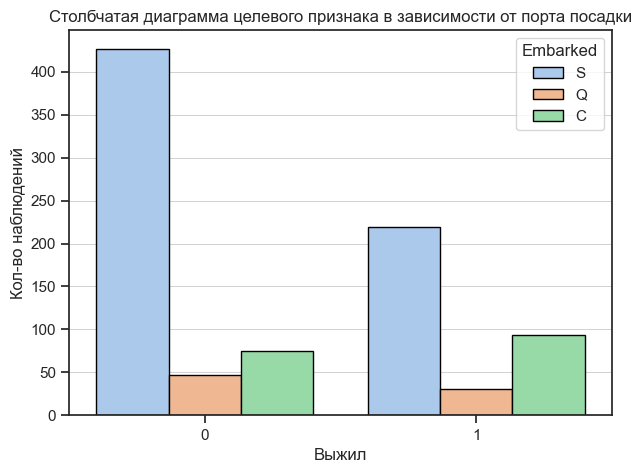

In [11]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
              x='Survived',
              hue='Embarked',
              palette = "pastel",
              edgecolor='black')
plt.xlabel('Выжил')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма целевого признака в зависимости от порта посадки')
plt.show()

1. Большая часть пассажиров села на корабль в Саутгемптоне(S) и большая часть этих пассажиров не выжила
2. Среди тех, кто сел на корабль в Шербуре(C), выживших больше, чем погибших

### Распределение возраста в зависимости от пола и целевого признака

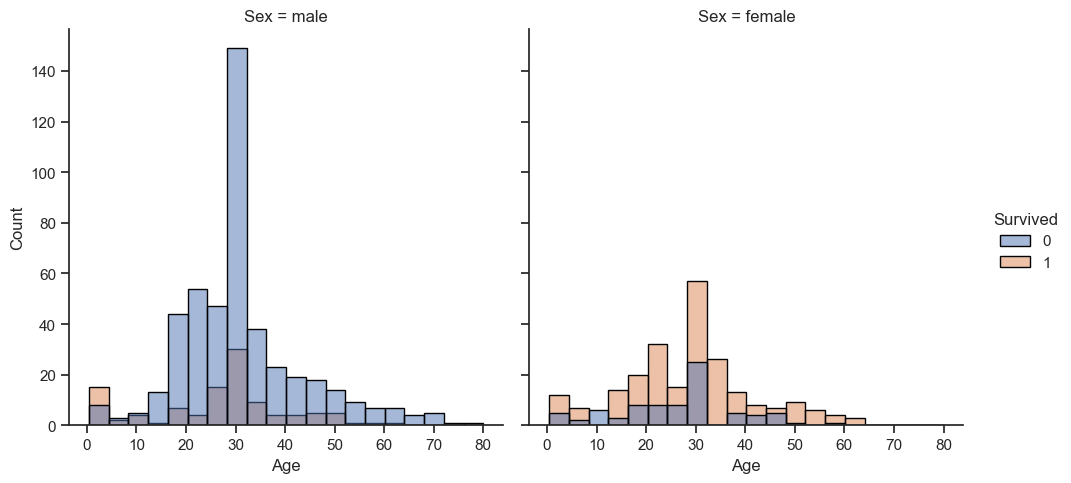

In [12]:
sns.displot(train_df,
           x = 'Age',
           col = 'Sex',
           hue = 'Survived',
           bins= 20,
           edgecolor='black')
plt.show()

In [13]:
train_df.groupby(['Survived', 'Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [14]:
train_df.groupby(['Survived', 'Sex']).mean(numeric_only=True)['Age']

Survived  Sex   
0         female    26.023272
          male      31.175224
1         female    28.979263
          male      27.631705
Name: Age, dtype: float64

1. Большинство мужчин среди всех возрастов не выжило
2. Большниство женщин, среди всех возрастов выжило
3. В наборе данных большинство пассажиров в возрасте примерно от 20 до 35 лет
4. Средний возраст мужчин и женщин примерно одинаков

### Распределение цены билета в зависимости от целевого признака

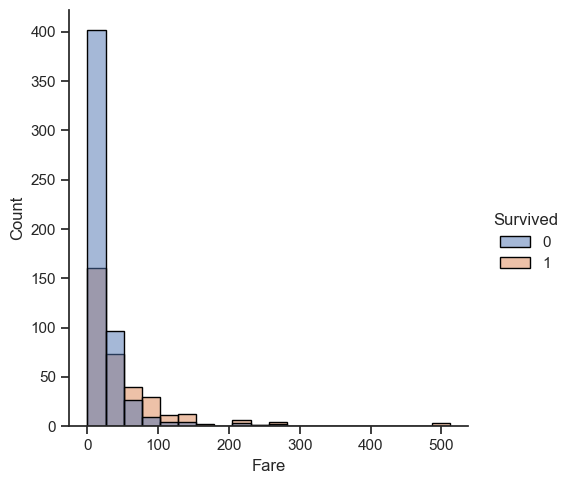

In [15]:
sns.displot(train_df,
           x = train_df['Fare'],
           hue = 'Survived',
           bins= 20,
           edgecolor='black')
plt.show()

1. Большинство наблюдений сконцентрированы вблизи нуля
2. Видно, что при более высокой цене билета, кол-во выживших превышает кол-во погибших

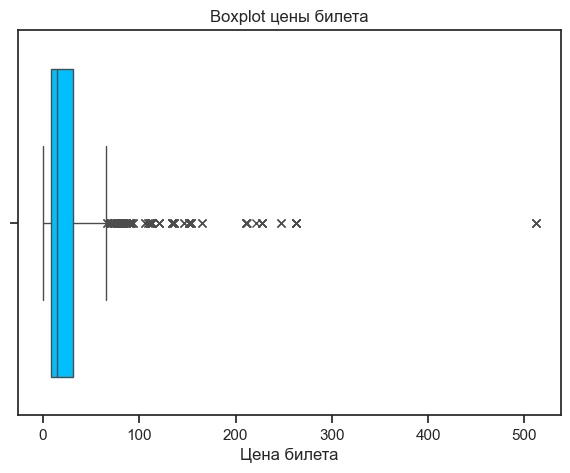

In [16]:
sns.boxplot(x=train_df['Fare'], flierprops={"marker": "x"}, boxprops={"facecolor": 'deepskyblue'})
plt.xlabel('Цена билета')
plt.title('Boxplot цены билета')
plt.show()

Присутствуют значительные отклонения от медианы. Есть много наблюдений, где цена билета > 75 и несколько, где цена > 200.

### Столбчатая диаграмма целевого признака в зависимости от новой переменной IsAlone

Искусственно сгенерирую переменные Relatives и IsAlone, которые будут содержать информацию об общем числе родственников пассажира на корабле и путешествовал ли пассажир один или с кем то.

In [17]:
train_df['Relatives'] = train_df['SibSp'] + train_df['Parch']
train_df.loc[train_df['Relatives'] > 0, 'IsAlone'] = 0
train_df.loc[train_df['Relatives'] == 0, 'IsAlone'] = 1

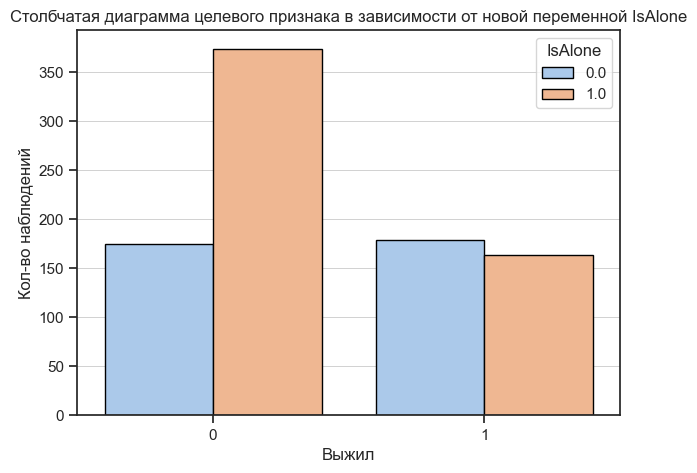

In [18]:
plt.grid(axis='y', color='grey', linewidth=0.5, alpha=0.5)
sns.countplot(data=train_df, 
              x='Survived',
              hue='IsAlone',
              palette = "pastel",
              edgecolor='black')
plt.xlabel('Выжил')
plt.ylabel('Кол-во наблюдений')
plt.title('Столбчатая диаграмма целевого признака в зависимости от новой переменной IsAlone')
plt.show()

Похоже, что большинство пассажиров, путешествовавших в одиночку, не выжило. 

### Корреляционный анализ

Что бы увидеть зависимости между целевым признаком и категориальными в наборе даных, можно создать фиктивная переменные.

In [19]:
train_df= pd.get_dummies(data=train_df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

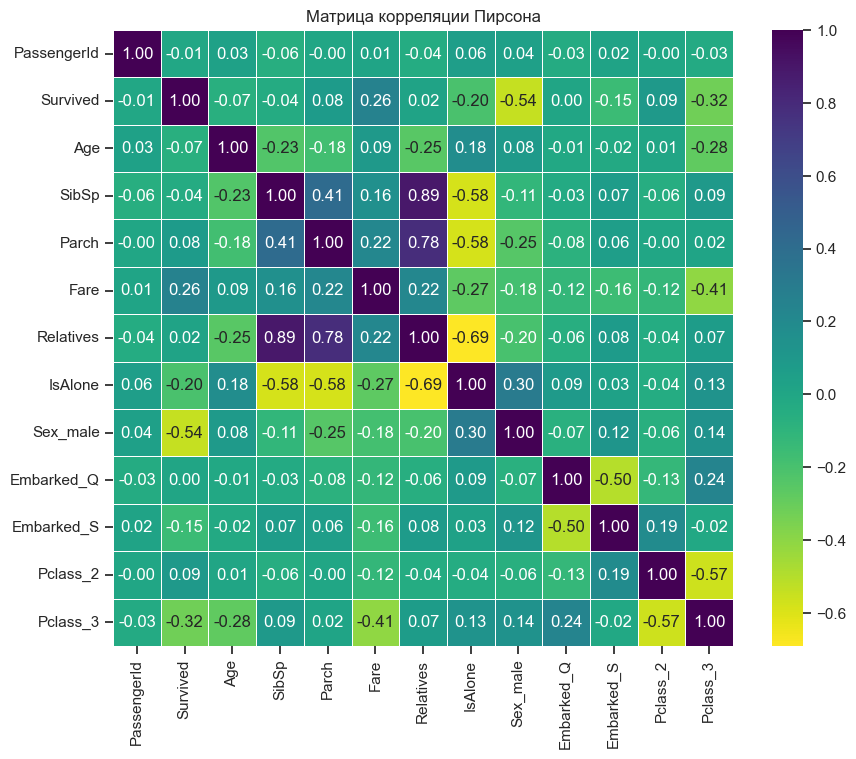

In [20]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции Пирсона')
plt.show()

1. Признаки _Age_, _SibSp_, _Parch_, _Relatives_, _Embarked_Q_, _Pclass_2_ не имеют почти никакой линейной связи с целевым признаком;
2. Признаки _Pclass_, _Fare_, _IsAlone_, _Emarked_C_, _Embarked_S_, _Pclass_3_ имеют слабую взаимосвязь с целевым признаком;
3. Признак _Sex_male_ имеет наиболее сильную взаимосвязь с целевым признаком;
4. Искусственно созданные признаки и фиктивные переменные имеют сильную взаимосвязь с независимыми переменными с помощью которых они создавались и друг с другом, что говорит о мультиколлинеарности в наборе данных;